# Backlog

1. Need some data processing on the dataset for the extra 3 points, i think there's another dataset in Kaggle
2. Second figure, K Means or clustering or something
3. Continue to improve/add complexity to the Logistic regression Pipeline
4. Clean up this markdown file with formatting and organization
5. Write final report
6. Need to specifiy more clearly why outlier detection is going on for cholesterol, justify myself

## Data Source:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, permutation_test_score
from sklearn.cluster import KMeans

In [15]:
plt.rcParams['font.size'] = '12'

In [16]:
# https://stackoverflow.com/questions/51752298/seeking-a-faster-way-to-drop-all-placeholders-from-pandas-dataframe
# https://towardsdatascience.com/how-to-use-data-files-from-uci-68b740b4719d

df =  pd.read_csv('processed.cleveland.data', sep=",", na_values=["?"])
orig_cols = df.columns
df = df.dropna()

print("Number of Datapoints: ", len(df))
df.head()

Number of Datapoints:  296


,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


As seen above, the data is currently in a very confusing format, since the column names are represented as values instead of their actual meaning, thus, we will rename the columns in the following cell

In [17]:
df["Age"] = df["63.0"]
df["Sex"] = df["1.0"]
df["Chest Pain"] = df["1.0.1"]
df["Rest BP"] = df["145.0"]
df["Chol"] = df["233.0"]
df["Blood Sugar"] = df["1.0.2"]
df["Rest ECG"] = df["2.0"]
df["Max HR"] = df["150.0"]
df["Exercise"] = df["0.0"]
df["Peak"] = df["2.3"]
df["Slope"] = df["3.0"]
df["Vessels"] = df["0.0.1"]
df["Thal"] = df["6.0"]
df["Output"] = df["0"]

df = df.drop(columns = orig_cols)
df.head()

,Age,Sex,Chest Pain,Rest BP,Chol,Blood Sugar,Rest ECG,Max HR,Exercise,Peak,Slope,Vessels,Thal,Output
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


Our analysis is simply looking for the presence of heart disease, not the types of heart disease, therefore we will alter the data so the any value 0-4 is either a 0 or 1. As according to the critiria stated in the original dataset:

"58 num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing"

In [18]:
df.loc[df['Output'] > 0, 'Output'] = 1 
df.loc[df['Output'] == 0, 'Output'] = 0 

## Outlier Testing and Filtering

In [19]:
info = df.describe()
info

,Age,Sex,Chest Pain,Rest BP,Chol,Blood Sugar,Rest ECG,Max HR,Exercise,Peak,Slope,Vessels,Thal,Output
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.513514,0.675676,3.165541,131.648649,247.398649,0.141892,0.993243,149.597973,0.327703,1.051351,1.597973,0.679054,4.726351,0.462838
std,9.051631,0.468915,0.958262,17.775956,52.078915,0.349530,0.994879,22.980401,0.470171,1.165841,0.613848,0.939726,1.940500,0.499461
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.250000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


- In the Cholesterol column, we see that the maximum value is 564, versus an average of ~250. In the following section we will perform analysis to determine if there are outliers, and filter accordingly in the Cholesterol column
- We will only do this in Cholesterol column, since 564 is more than two times what is considered "High" cholesterol, and there are most likely other factors at play here that could skew analysis
https://www.cnn.com/2009/HEALTH/11/24/moh.healthmag.cholesterol.surprises/index.html

In [20]:
# https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244

IQR = df["Chol"].quantile(0.75) - df["Chol"].quantile(0.25)

max_chol = (1.5 * IQR) + df["Chol"].quantile(0.75)
min_chol = df["Chol"].quantile(0.25) - (1.5 * IQR) 

df = df[df["Chol"] <= max_chol]
df = df[df["Chol"] >= min_chol]

print("Number of Datapoints: ", len(df))
df.head()

Number of Datapoints:  291


,Age,Sex,Chest Pain,Rest BP,Chol,Blood Sugar,Rest ECG,Max HR,Exercise,Peak,Slope,Vessels,Thal,Output
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


## Dataset Information

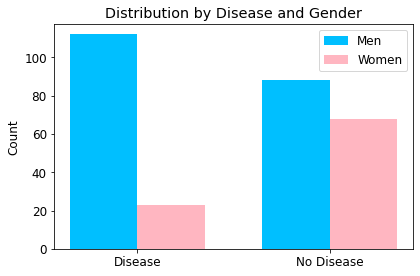

In [21]:
disease = df[df["Output"] == 1]
no_disease = df[df["Output"] == 0]

labels = ['Disease', 'No Disease']
men_vals = [len(disease[disease["Sex"] == 1]), len(no_disease[no_disease["Sex"] == 1])]
women_vals = [len(disease[disease["Sex"] == 0]), len(no_disease[no_disease["Sex"] == 0])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_vals, width, label='Men', color="deepskyblue")
rects2 = ax.bar(x + width/2, women_vals, width, label='Women', color="lightpink")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Distribution by Disease and Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [22]:
print("Men with disease: ", (round((len(disease[disease["Sex"] == 1]) / len(df)) * 100, 2)))
print("Men without disease: ", (round((len(no_disease[no_disease["Sex"] == 1]) / len(df)) * 100, 2)))
print()
print("Women with disease: ", (round((len(disease[disease["Sex"] == 0]) / len(df)) * 100, 2)))
print("Women without disease: ", (round((len(no_disease[no_disease["Sex"] == 0]) / len(df)) * 100, 2)))

Men with disease:  38.49
Men without disease:  30.24

Women with disease:  7.9
Women without disease:  23.37


## Preparation for Model Training

In [23]:
train, test = train_test_split(df)

In [24]:
data_columns = ["Age", "Sex", "Chest Pain", "Rest BP", "Chol", 
                "Blood Sugar", "Rest ECG", "Max HR", "Exercise", 
                "Peak", "Slope", "Vessels", "Thal"]

y = "Output"

# Figure 1

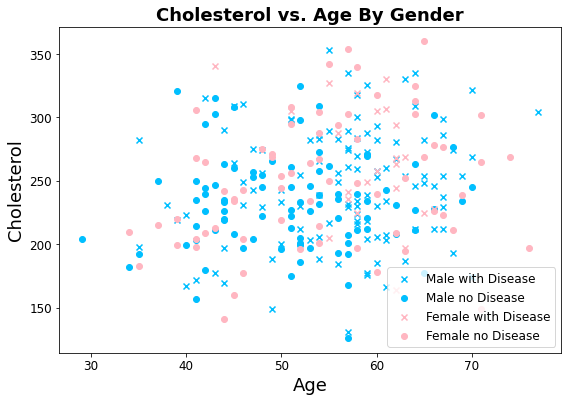

In [25]:
male = df[df['Sex'] == 1]
female = df[df['Sex'] == 0]

male_likely = male[male["Output"] == 1]
male_non = male[male["Output"] == 0]

female_likely = female[female["Output"] == 1]
female_non = female[female["Output"] == 0]

fig, ax = plt.subplots(figsize=(9,6))

ax.set_ylabel("Cholesterol", fontsize=18,)
ax.set_xlabel("Age", fontsize=18,)
ax.set_title("Cholesterol vs. Age By Gender", fontsize=18, weight="heavy")

ax.scatter(x=male_likely["Age"], y=male_likely["Chol"], marker="x", label="Male with Disease", color="deepskyblue")
ax.scatter(x=male_non["Age"], y=male_non["Chol"], marker="o", label="Male no Disease", color="deepskyblue")

ax.scatter(x=female_likely["Age"], y=female_likely["Chol"], marker="x", label="Female with Disease", color="lightpink")
ax.scatter(x=female_non["Age"], y=female_non["Chol"],  marker="o", label="Female no Disease", color="lightpink")

ax.legend()

# Resting Blood Pressure vs. Cholesterol By Heart Disease

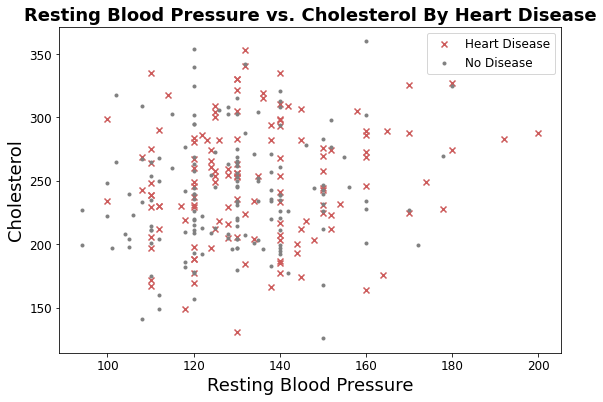

In [26]:
disease = df[df["Output"] == 1]
no_disease = df[df["Output"] == 0]

fig, ax = plt.subplots(figsize=(9,6))

ax.set_ylabel("Cholesterol", fontsize=18,)
ax.set_xlabel("Resting Blood Pressure", fontsize=18,)
ax.set_title("Resting Blood Pressure vs. Cholesterol By Heart Disease", fontsize=18, weight="heavy")

ax.scatter(x=disease["Rest BP"], y=disease["Chol"], marker="x", label="Heart Disease", color="indianred")
ax.scatter(x=no_disease["Rest BP"], y=no_disease["Chol"],  marker=".", label="No Disease", color="gray")

ax.legend()

### We can then see that there isn't much of a correlation with these "major" factors
- A simple Logistic Regression model that only takes these factors into account is only able to achieve an accuracy of ~53%

In [27]:
lr = LogisticRegression()
lr.fit(train[["Chol", "Rest BP"]], train["Output"])
(lr.score(test[["Chol", "Rest BP"]], test["Output"]) * 100).round(2)

47.95

# Figure 2: K Means / PCA

In [28]:
disease = df[df["Output"] == 1]
chol_bp = disease[["Rest BP","Chol"]]

In [39]:
km = KMeans(n_clusters=4)

km.fit(chol_bp)
clusters = km.predict(chol_bp)
clusters

array([3, 2, 3, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 0, 3, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 3, 0, 1, 2, 2, 2, 2, 0, 2, 3, 3, 0, 2, 2, 3, 0,
       0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 3, 2, 0, 1, 0, 3, 1, 2, 3,
       3, 2, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 0, 2, 1, 3, 3, 2, 1, 1, 1, 3,
       1, 2, 0, 2, 2, 3, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0,
       2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2], dtype=int32)

<AxesSubplot:xlabel='0', ylabel='1'>

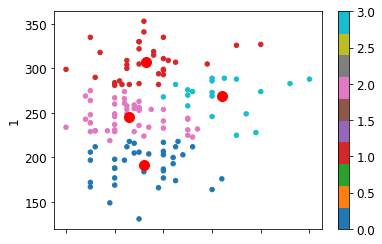

In [40]:
df["cluster"] = pd.Series(clusters, index=chol_bp.index)
ax = df.plot.scatter(x="Rest BP", y="Chol", c=df["cluster"], cmap="tab10")
pd.DataFrame(km.cluster_centers_).plot.scatter(ax=ax, x=0, y=1, c="red", s=100)

# Figure 3: Logistic Regression
- Using a sklearn pipeline, we are able to produce a solid score taking all factors into account

In [31]:
train = train.copy()
test = test.copy()

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression())
])

pipe.fit(train[data_columns], train[y])
(pipe.score(test[data_columns], test[y]) * 100).round(2)

75.34

In [32]:
cross_val_score(pipe, test[data_columns], test[y], cv=15).mean()

0.7233333333333333

In [41]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html
score, garbage_score, p = permutation_test_score(pipe, test[data_columns], test[y])

<AxesSubplot:>

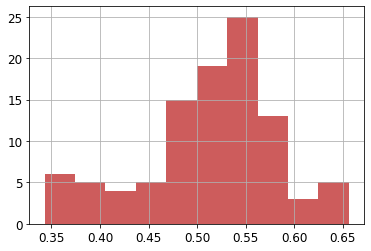

In [42]:
pd.Series(garbage_score).hist(color="indianred")

In [43]:
p

0.009900990099009901

Taken from the documentation for permutation_test_score:

"A small p-value suggests that there is a real dependency between features and targets which has been used by the estimator to give good predictions."

Thus, this test suggests that there is indeed a relationship between the features of this data and its target variable, and our model accurately reflects such relationship

## Graphing Coefficients

In [36]:
coefs = list(pipe.named_steps['lr'].coef_[0])
coefs

[-0.12826353337110125,
 0.37486638627868285,
 0.7878001193833957,
 0.44824512919554826,
 0.5400751463593114,
 -0.19280523718099477,
 0.2847871924013826,
 -0.5811489134658413,
 0.45250611333947416,
 0.19182226062226213,
 0.40476371178074466,
 0.9166905521433775,
 0.7778616913431409]

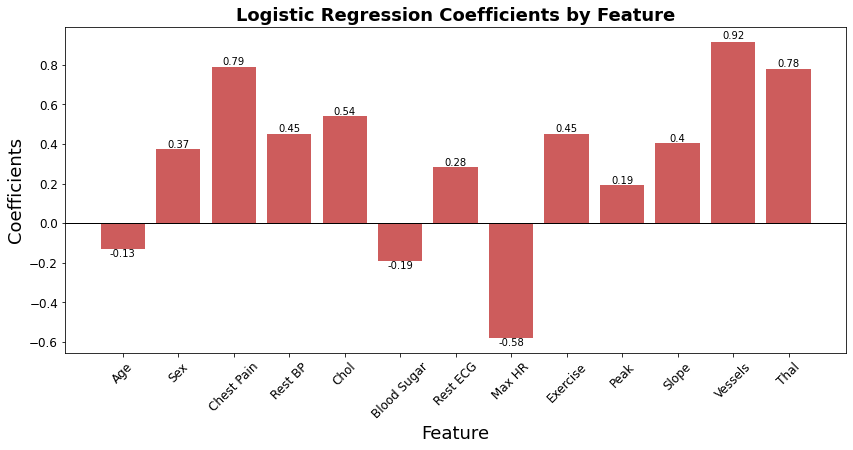

In [37]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
# https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

fig, ax = plt.subplots(figsize=(14, 6))

ax.axhline(0, color='k', linewidth=1)

ax.set_ylabel("Coefficients", fontsize=18)
ax.set_xlabel("Feature", fontsize=18)
ax.set_title("Logistic Regression Coefficients by Feature", fontsize=18, weight="heavy")
plt.xticks(rotation=45)

bars = ax.bar(data_columns, height=coefs, color="indianred")

for bar in bars:
    height = bar.get_height().round(2)
    label_x_pos = bar.get_x() + bar.get_width() / 2
    if height > 0:
        ax.text(label_x_pos, height, s=f'{height}', ha='center',
        va='bottom', fontsize=10)
    else:
        ax.text(label_x_pos, height, s=f'{height}', ha='center',
        va='top', fontsize=10)
    